# **CASA0007: Quantitative Methods**

### *Has socioeconomic deprivation increased drug-related crimes in London over the years? Exploring the relationship between levels of deprivation (as measured by the Index of Multiple Deprivation) and drug-related crimes in London from 2011 to 2019.*

**STRUCTURE**


*   1A) Drug Offences in London (2011 & 2019)
*   1B) Investigating London Boroughs in relation to growth in 'drug offences'
*   2) Newham Borough in relation to drug offences
*   3A) Analysis of London with Index of Multiple Deprivation
*   3B) Correlation Matrix
*   3C) Domains of Deprivation in relation to Newham
*   4) Conclusion



# Installing Important Packages

In [ ]:
!pip install python-calamine
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **1A) Drug Offences in London (2011 and 2019)**

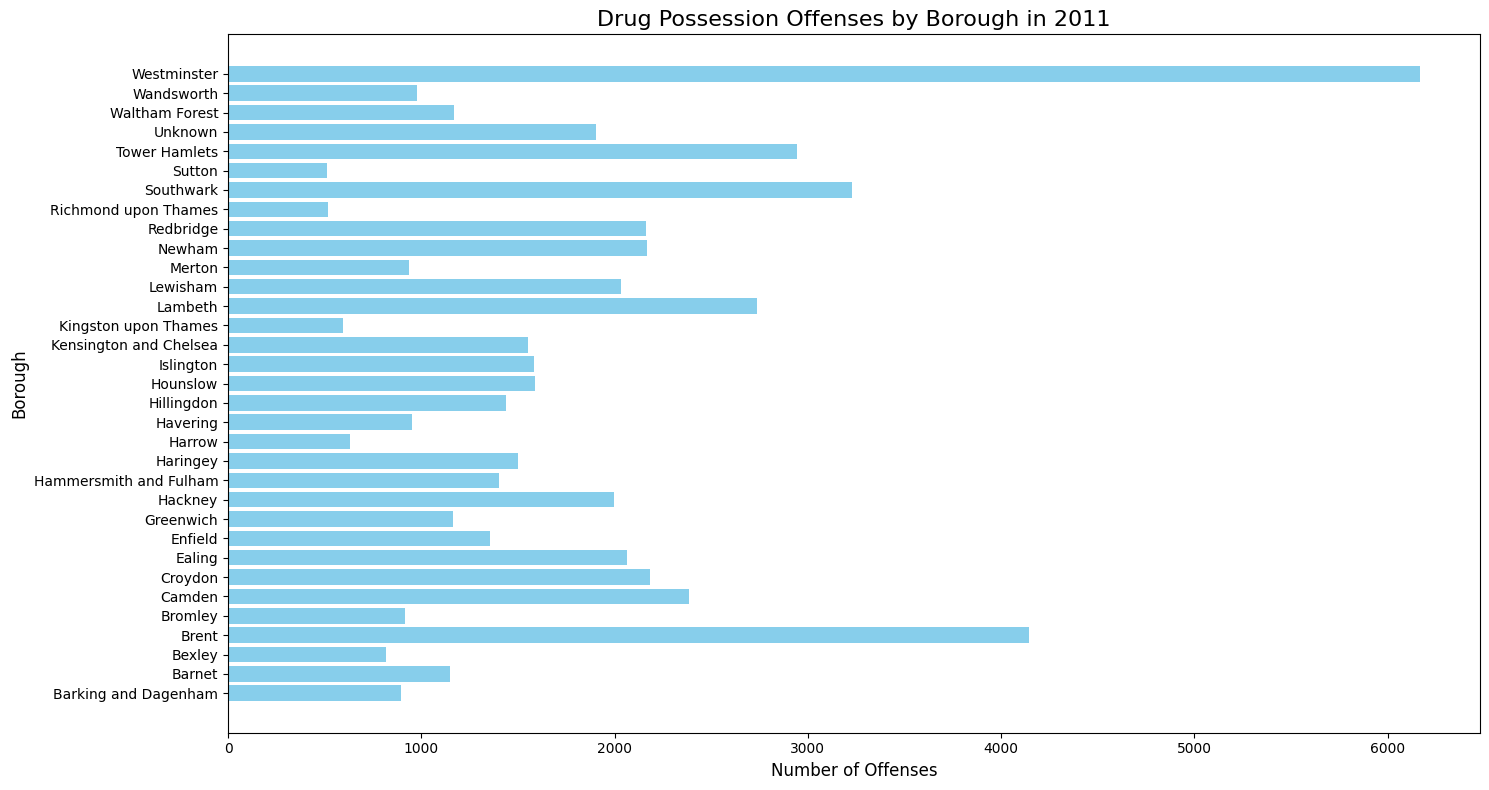

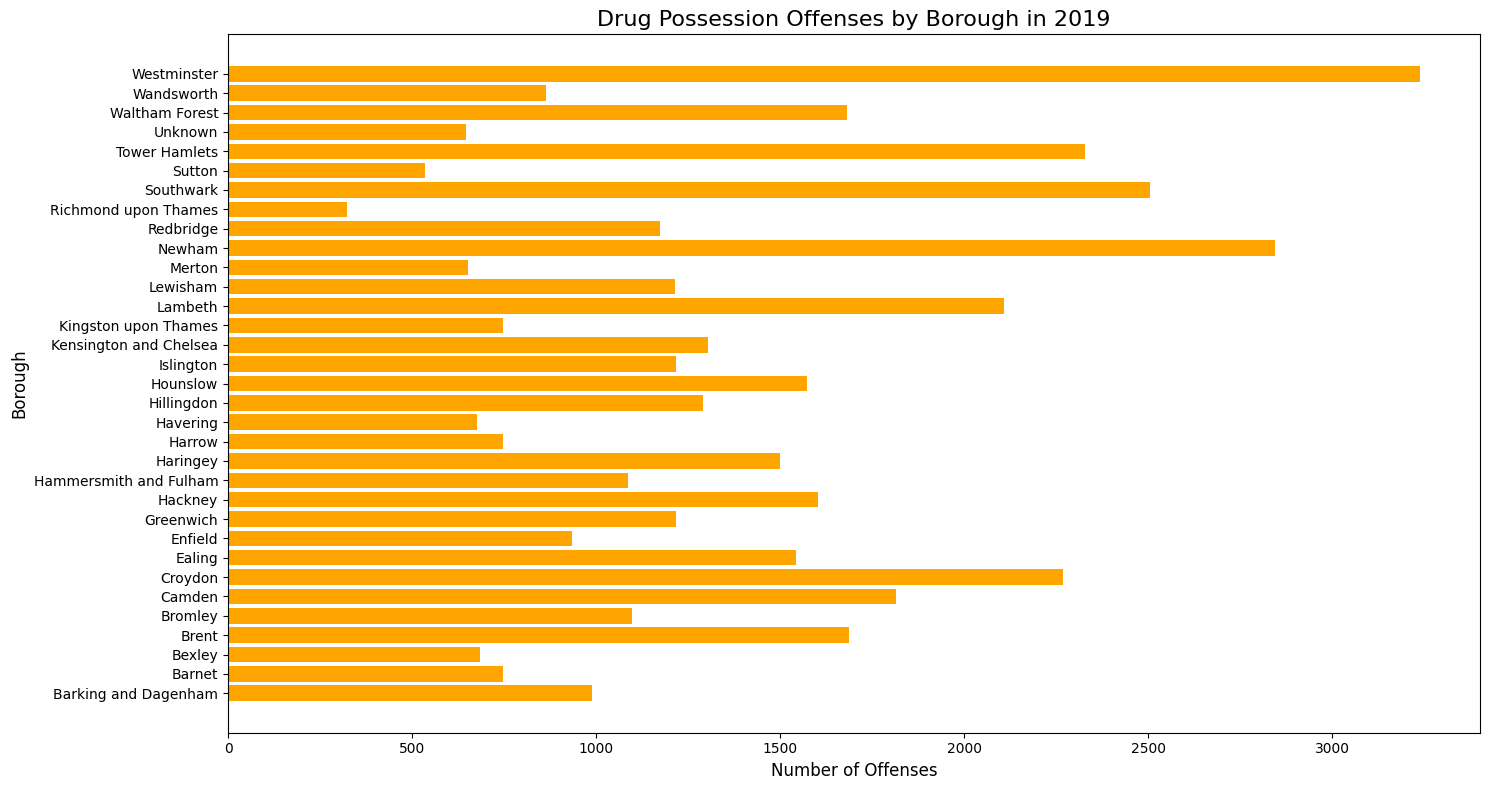

In [ ]:
# Load the crime data for 2011 and 2019
drug_data = pd.read_excel('2011 and 2019 borough crime.xlsx', sheet_name='Sheet1')

# Extracting the relevant columns: 'BoroughName', 'Year 2011', and 'Year 2019'
drug_data_filtered = drug_data[['BoroughName', 'Year 2011', 'Year 2019']]

# Sorting the data alphabetically by borough name for consistent visualizations
drug_data = drug_data.sort_values('BoroughName')

# Create the 2011 bar chart
plt.figure(figsize=(15, 8))
plt.barh(drug_data['BoroughName'], drug_data['Year 2011'], color='skyblue')
plt.title("Drug Possession Offenses by Borough in 2011", fontsize=16)
plt.xlabel("Number of Offenses", fontsize=12)
plt.ylabel("Borough", fontsize=12)
plt.tight_layout()
plt.show()

# Create the 2019 bar chart
plt.figure(figsize=(15, 8))
plt.barh(drug_data['BoroughName'], drug_data['Year 2019'], color='orange')
plt.title("Drug Possession Offenses by Borough in 2019", fontsize=16)
plt.xlabel("Number of Offenses", fontsize=12)
plt.ylabel("Borough", fontsize=12)
plt.tight_layout()
plt.show()

# **1B) Investigating which borough had the biggest increase in drug offences**

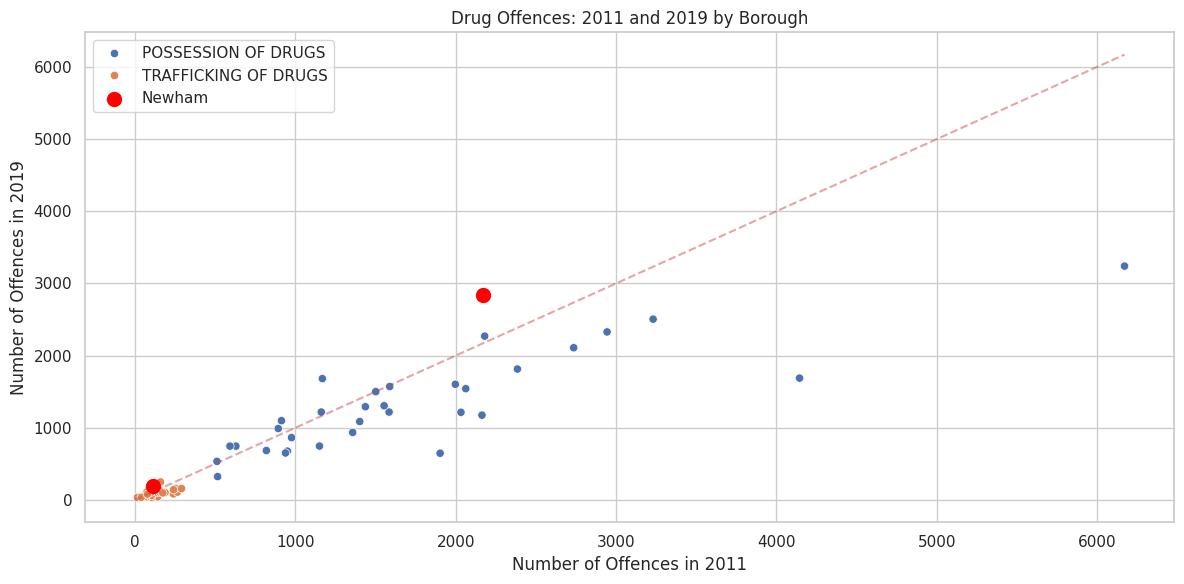

Newham Drug Offences Statistics:
               MinorText  Year 2011  Year 2019
46   POSSESSION OF DRUGS       2170       2844
47  TRAFFICKING OF DRUGS        116        187


In [ ]:
#Drug offences from 2011 and 2019 in relation to London Boroughs
sns.set_theme(style="whitegrid")

# Filtering for Newham data
newham_data = drug_offences[drug_offences['BoroughName'] == 'Newham']

# Creating a comparison of 2011 vs 2019 for all boroughs
plt.figure(figsize=(12, 6))
sns.scatterplot(data=drug_offences, x='Year 2011', y='Year 2019', hue='MinorText')
plt.title('Drug Offences: 2011 and 2019 by Borough')
plt.xlabel('Number of Offences in 2011')
plt.ylabel('Number of Offences in 2019')

# Add reference line
max_val = max(drug_offences['Year 2011'].max(), drug_offences['Year 2019'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5)

# Highlight Newham
newham_points = drug_offences[drug_offences['BoroughName'] == 'Newham']
plt.scatter(newham_points['Year 2011'], newham_points['Year 2019'],
           color='red', s=100, label='Newham', zorder=5)

plt.legend()
plt.tight_layout()
plt.show()

# Print Newham specific statistics
print("\
Newham Drug Offences Statistics:")
print(newham_data[['MinorText', 'Year 2011', 'Year 2019']])

**Looking specifically at Newham's statistics**

**The scatter plot above shows the comparison of drug offences between 2011 and 2019 for all London boroughs. Points above the red dashed line indicate an increase in offences from 2011 to 2019. Newham (highlighted in red) shows a notable increase in both possession and trafficking.**



# **2) Newham in relation to drug offences**

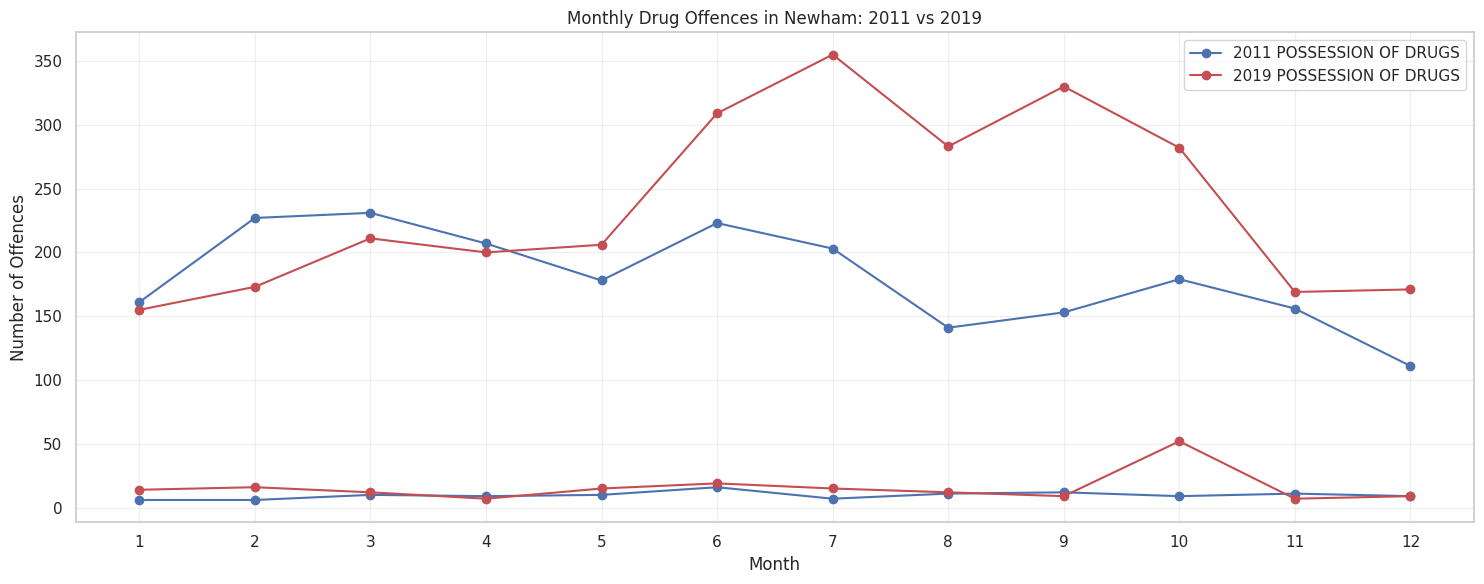

Monthly Averages for Newham:
POSSESSION OF DRUGS:
2011 average: 180.8 cases per month
2019 average: 237.0 cases per month
TRAFFICKING OF DRUGS:
2011 average: 9.7 cases per month
2019 average: 15.6 cases per month


In [ ]:
# Creating monthly data for Newham
newham_data = drug_offences_df[drug_offences_df['BoroughName'] == 'Newham']

# Get monthly columns for 2011 and 2019
months_2011 = [col for col in drug_offences_df.columns if str(col).startswith('2011')]
months_2019 = [col for col in drug_offences_df.columns if str(col).startswith('2019')]

# Creating monthly trends plot
plt.figure(figsize=(15, 6))

# Plot 2011 data
for idx, row in newham_data.iterrows():
    monthly_2011 = [row[col] for col in months_2011]
    monthly_2019 = [row[col] for col in months_2019]

    plt.plot(range(1, 13), monthly_2011, 'b-', label=f'2011 {row["MinorText"]}' if idx == newham_data.index[0] else "", marker='o')
    plt.plot(range(1, 13), monthly_2019, 'r-', label=f'2019 {row["MinorText"]}' if idx == newham_data.index[0] else "", marker='o')

plt.title('Monthly Drug Offences in Newham: 2011 vs 2019')
plt.xlabel('Month')
plt.ylabel('Number of Offences')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# Calculating monthly averages
print("\
Monthly Averages for Newham:")
for idx, row in newham_data.iterrows():
    avg_2011 = sum([row[col] for col in months_2011]) / 12
    avg_2019 = sum([row[col] for col in months_2019]) / 12
    print(f"{row['MinorText']}:")
    print(f"2011 average: {avg_2011:.1f} cases per month")
    print(f"2019 average: {avg_2019:.1f} cases per month\
")

## Key insights:
*  Drug possession offences increased from an average of **180.8 cases per month in 2011 to 237.0 in 2019.**
* Drug trafficking offences rose from **9.7 to 15.6 cases per month over the same period**.




# **3) Methodology**

#**3A) Analysis of London Boroughs in relation to Socioeconomic Deprivation (Index of Multiple Deprivation)**

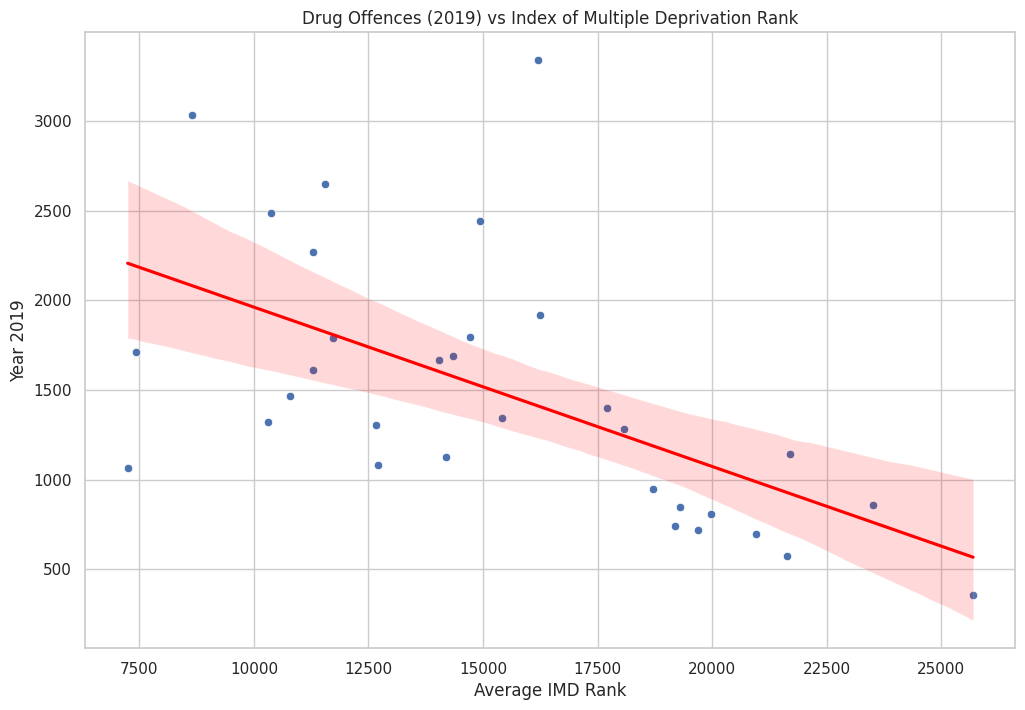

Correlation coefficient between Drug Offences and IMD Rank: -0.5835138193695415
Top 5 boroughs by drug offences in 2019:
      BoroughName  Year 2019  Average IMD Rank
32    Westminster       3338      16194.968750
23         Newham       3031       8650.018293
26      Southwark       2647      11546.481928
28  Tower Hamlets       2486      10369.312500
6         Croydon       2443      14926.636364


In [ ]:
# Calculating total drug offences per borough for 2019
drug_offences_2019 = drug_offences_df.groupby('BoroughName')['Year 2019'].sum().reset_index()

# Calculating average IMD rank per borough and creating a map of borough names to their average IMD rank
borough_imd = {}
for borough in drug_offences_2019['BoroughName'].unique():
    # Convert borough names to match the format in domains data
    borough_name = borough
    matching_lsoas = domains_df[domains_df['Local Authority District name (2019)'].str.contains(borough, na=False)]
    if not matching_lsoas.empty:
        avg_imd_rank = matching_lsoas['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'].mean()
        borough_imd[borough] = avg_imd_rank

# Create a combined dataframe
analysis_df = drug_offences_2019.copy()
analysis_df['Average IMD Rank'] = analysis_df['BoroughName'].map(borough_imd)

# Calculating correlation
correlation = analysis_df['Year 2019'].corr(analysis_df['Average IMD Rank'])

# Creating visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=analysis_df, x='Average IMD Rank', y='Year 2019')
plt.title('Drug Offences (2019) vs Index of Multiple Deprivation Rank')
plt.xlabel('Average IMD Rank (lower = more deprived)')
plt.ylabel('Number of Drug Offences (2019)')

# Adding trend line
sns.regplot(data=analysis_df, x='Average IMD Rank', y='Year 2019', scatter=False, color='red')

plt.show()

print("Correlation coefficient between Drug Offences and IMD Rank:", correlation)
print("\
Top 5 boroughs by drug offences in 2019:")
print(analysis_df.sort_values('Year 2019', ascending=False).head())

In [ ]:
df_loaded = pd.read_csv('/content/drug_offenses_by_deprivation_level (table).csv')
print(df_loaded)

  Deprivation_Category     mean     std  count
0     High Deprivation  1926.45  605.89     11
1   Medium Deprivation  1730.80  696.22     10
2      Low Deprivation   815.82  253.45     11


## **Insights and Key Findings from scatter plot and correlation coefficient**

* Top 5 boroughs by drug offences in 2019:
 * Wesminster
 * Newham
 * Southwark
 *Tower Hamlets
 * Croydon

* Correlation Analysis: Correlation between Drug Offences and IMD Rank: **-0.586852015915355**

* **Moderate to Strong Negative Correlation** There is a moderate to strong negative correlation (-0.59) between drug offenses and the Index of Multiple Deprivation (IMD) rank. Since lower IMD ranks indicate higher deprivation, this means more deprived areas tend to have higher drug offense rates.

* **Deprivation Level Analysis:**The data shows that as deprivation decreases (from High to Low), the mean value decreases significantly, with less variability in the Low Deprivation group, suggesting a correlation between deprivation levels and drug offences.

* **Disparity Between Areas**
 * Areas with high deprivation average about 1,926 drug offenses
 * Low deprivation areas average about 816 drug offenses
 * The ratio between high and low deprivation areas is 2.36, meaning highly deprived areas experience more than double the drug offenses

* **Visual Representation:** The scatter plot shows the relationship between drug offenses and deprivation rank. The downward trend ** confirms our correlation analysis** as seeb awith the red trend line indicating the negative correlation. There is a correlation between a low IMD and drug offences suggesting that more deprived areas are experiencing substantially higher rates of drug-related crime. This could have important implications for resource allocation and policy interventions in London boroughs.


# **3B) Correlation Matrix (Heatmap) for Newham**

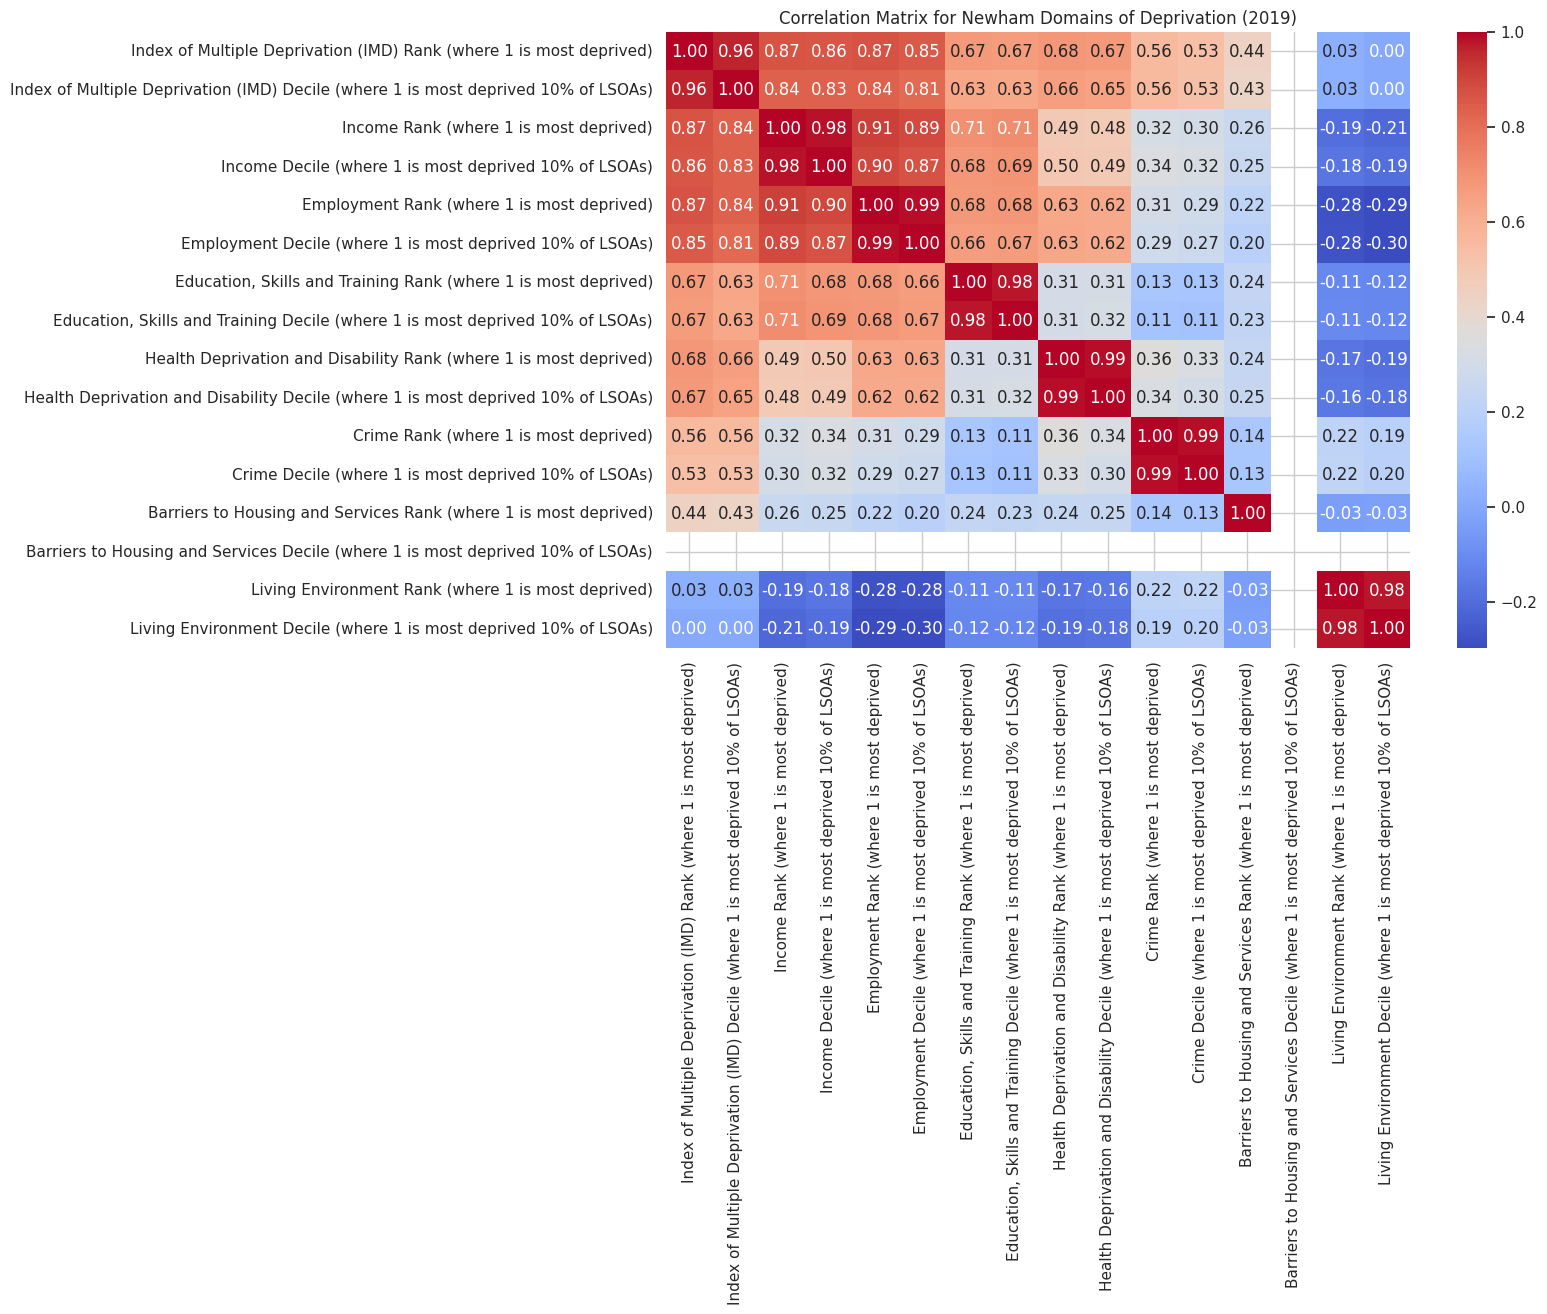

In [ ]:
# Filtering the domains of deprivation data for Newham
newham_data = domains_df[domains_df['Local Authority District name (2019)'].str.contains('Newham', na=False)]

# Calculating average ranks for each domain in Newham
newham_averages = {
    'IMD Rank': newham_data['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'].mean(),
    'Income Rank': newham_data['Income Rank (where 1 is most deprived)'].mean(),
    'Employment Rank': newham_data['Employment Rank (where 1 is most deprived)'].mean(),
    'Education Rank': newham_data['Education, Skills and Training Rank (where 1 is most deprived)'].mean(),
    'Health Rank': newham_data['Health Deprivation and Disability Rank (where 1 is most deprived)'].mean(),
    'Crime Rank': newham_data['Crime Rank (where 1 is most deprived)'].mean()
}

# Creating a dataframe for visualization
newham_averages_df = pd.DataFrame(list(newham_averages.items()), columns=['Domain', 'Average Rank'])

# Correlation analysis between domains in Newham
# Making sure only numeric columns are filtered for correlation analysis before calling .corr()
numeric_columns = newham_data.select_dtypes(include=['number'])
newham_correlation = numeric_columns.corr() # Calculate correlation on numeric data only

# Code to display the cleansed correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(newham_correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Newham Domains of Deprivation (2019)')
plt.show()

**Whar does a correlation Matrix show?** Correlation matrix for Newham shows the relationships between different deprivation domains, with values ranging from -1 to 1. Positive values indicate that as one domain's rank increases (less deprived), the other domain's rank also increases, while negative values indicate an inverse relationship.

**Why would a Matrix be suitablw?** A matrix was used because it allows us to analyze pairwise relationships between multiple variables simultaneously, providing a comprehensive view of how each domain relates to others, or which domains are most strongly associated with each other. This is essential for gaining insight about potential causal relationships and understanding how interconnected deprivation domains might influence underlying factors, in this case, drug offences.

**Explanation of the Correlation Matrix for Newham:**

What the Numerical Figures Mean:

The correlation values range from -1 to 1:
* 1: Perfect positive correlation (as one variable increases, the other increases).
* -1: Perfect negative correlation (as one variable increases, the other decreases).
* 0: No correlation (no relationship between the variables).

*For example, if the correlation between "Income Rank" and "Crime Rank" is -0.5, it suggests that areas with higher income deprivation (lower rank) tend to have higher crime deprivation (lower rank).*

**Deprivation Domains That Could Influence Drug Offences:**

* **Income Deprivation:** Areas with lower income levels may have higher drug offences due to economic stress and limited opportunities.
* **Crime Deprivation:** A strong correlation between crime and drug offences is expected, as drug-related activities often contribute to overall crime rates.
Health Deprivation: Poor health outcomes may correlate with drug offences due to substance abuse issues.
* **Education Deprivation:** Lack of education and skills can lead to unemployment, which may increase the likelihood of drug-related crimes.
Housing and Living Environment: Poor living conditions may indirectly contribute to drug offences by fostering environments where such activities thrive.









# **3C) Domains of depirvation in relation to Newham**

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the files
borough_crime_file = '2011 and 2019 borough crime.xlsx'
domains_of_deprivation_file = '2019_Domains_of_Deprivation.xlsx'
lsoa_file = 'LSOA.xlsx'
mps_crime_file = 'MPS Borough Level Crime.csv'

# Read the Excel sheets for borough crime data
borough_crime_data = pd.read_excel(borough_crime_file, sheet_name=None, engine='openpyxl')

# Read the domains of deprivation data
domains_of_deprivation_data = pd.read_excel(domains_of_deprivation_file, sheet_name=None, engine='openpyxl')

# Read the LSOA data
lsoa_data = pd.read_excel(lsoa_file, engine='openpyxl')

# Read the MPS borough level crime data
mps_crime_data = pd.read_csv(mps_crime_file)

# Extract relevant data for drug offences from the borough crime data
borough_crime_df = borough_crime_data['Sheet1']

# Filter for drug offences only
drug_offences_df = borough_crime_df[borough_crime_df['MajorText'] == 'DRUG OFFENCES']

# Extract relevant columns from the domains of deprivation data
domains_df = domains_of_deprivation_data['IoD2019 Domains']

# Analyze relationship with specific deprivation domains
domains_of_interest = [
    'Crime Rank (where 1 is most deprived)',
    'Health Deprivation and Disability Rank (where 1 is most deprived)',
    'Income Rank (where 1 is most deprived)'
]

# Calculate average ranks for each domain per borough
borough_domain_ranks = {}
for borough in drug_offences_2019['BoroughName'].unique():
    matching_lsoas = domains_df[domains_df['Local Authority District name (2019)'].str.contains(borough, na=False)]
    if not matching_lsoas.empty:
        borough_domain_ranks[borough] = {
            domain: matching_lsoas[domain].mean()
            for domain in domains_of_interest
        }

# Creating expanded analysis dataframe
expanded_df = drug_offences_2019.copy()
for domain in domains_of_interest:
    domain_short = domain.split(' ')[0]  # Use first word of domain as column name
    expanded_df[f'{domain_short}_Rank'] = expanded_df['BoroughName'].map(
        {borough: ranks[domain] for borough, ranks in borough_domain_ranks.items()}
    )

# Calculate correlations
correlations = {
    domain.split(' ')[0]: expanded_df['Year 2019'].corr(expanded_df[f'{domain.split(" ")[0]}_Rank'])
    for domain in domains_of_interest
}

print("Correlations between Drug Offences and Specific Deprivation Domains:")
for domain, corr in correlations.items():
    print(f"{domain} Rank Correlation: {corr}")

Correlations between Drug Offences and Specific Deprivation Domains:
Crime Rank Correlation: -0.5294754826734333
Health Rank Correlation: -0.48083252527994425
Income Rank Correlation: -0.533630882402753


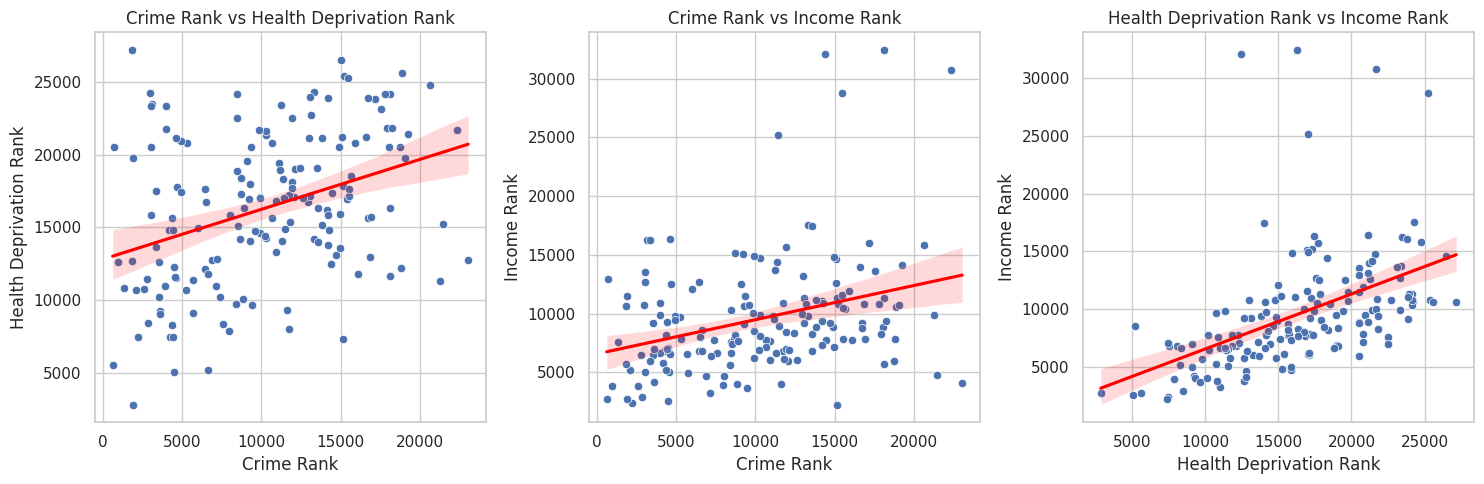

In [ ]:
# Reading the domains of deprivation data
domains_df = pd.read_excel('2019_Domains_of_Deprivation.xlsx', sheet_name='IoD2019 Domains')

# Filtering for Newham
newham_data = domains_df[domains_df['Local Authority District name (2019)'].str.contains('Newham', na=False)]

# Defining domains of interest
domains_of_interest = [
    'Crime Rank (where 1 is most deprived)',
    'Health Deprivation and Disability Rank (where 1 is most deprived)',
    'Income Rank (where 1 is most deprived)'
]

# Creating a dataframe with LSOA names and selected domains
newham_domains = newham_data[['LSOA name (2011)'] + domains_of_interest].copy()

# Creating a scatter plots to visualize relationships between Crime Rank, Health Deprivation, and Income Rank
plt.figure(figsize=(15, 5))

# Scatter plot 1: Crime Rank vs Health Deprivation Rank
plt.subplot(1, 3, 1)
sns.scatterplot(data=newham_domains, x='Crime Rank (where 1 is most deprived)', y='Health Deprivation and Disability Rank (where 1 is most deprived)')
sns.regplot(data=newham_domains, x='Crime Rank (where 1 is most deprived)', y='Health Deprivation and Disability Rank (where 1 is most deprived)', scatter=False, color='red')
plt.title('Crime Rank vs Health Deprivation Rank')
plt.xlabel('Crime Rank')
plt.ylabel('Health Deprivation Rank')

# Scatter plot 2: Crime Rank vs Income Rank
plt.subplot(1, 3, 2)
sns.scatterplot(data=newham_domains, x='Crime Rank (where 1 is most deprived)', y='Income Rank (where 1 is most deprived)')
sns.regplot(data=newham_domains, x='Crime Rank (where 1 is most deprived)', y='Income Rank (where 1 is most deprived)', scatter=False, color='red')
plt.title('Crime Rank vs Income Rank')
plt.xlabel('Crime Rank')
plt.ylabel('Income Rank')

# Scatter plot 3: Health Deprivation Rank vs Income Rank
plt.subplot(1, 3, 3)
sns.scatterplot(data=newham_domains, x='Health Deprivation and Disability Rank (where 1 is most deprived)', y='Income Rank (where 1 is most deprived)')
sns.regplot(data=newham_domains, x='Health Deprivation and Disability Rank (where 1 is most deprived)', y='Income Rank (where 1 is most deprived)', scatter=False, color='red')
plt.title('Health Deprivation Rank vs Income Rank')
plt.xlabel('Health Deprivation Rank')
plt.ylabel('Income Rank')

plt.tight_layout()
plt.show()

## **Explaining domains of deprivation in relation to drug offences**

The extracted correlations focus on key domains **(Crime, Income, and Health)** to evaluate their interrelationships and potential influence on drug offences. This will help identify which deprivation factors are most interconnected and relevant for further analysis.

Key Correlations for Crime, Income, and Health Domains:

**1. Crime Rank vs Health Deprivation Rank (First Plot):**
* The **correlation coefficient is 0.36**, showing a moderate positive relationship.
* What this means:
 * Areas with higher crime (lower crime rank) tend to have higher health deprivation (lower health rank). However, the relationship isn't very strong, suggesting other factors influence 'drug offences'.

* This could indicate that:
 * *Areas with poor health outcomes might have higher drug-related crimes*
 * *Health issues and substance abuse might be interconnected*
 * *Medical deprivation might correlate with higher drug usage and related*

**2. Crime Rank vs Income Rank (Middle Plot):**
* The **correlation coefficient is 0.32**, showing a moderate positive relationship
* Areas with lower income (lower ranks) tend to have slightly higher crime rates
The scattered pattern suggests that while income deprivation might contribute to drug offences, it's not the only factorInterpretation for drug offences.

* Economic stress might lead to:
 * *Higher drug-related activities for economic gain*
 * *Increased vulnerability to drug-related crimes*
 * *More reported drug offences in economically deprived areas*

**3. Health Deprivation vs Income Rank (Last Plot):**
* Shows the **strongest correlation (0.49) among the three relationships**
* Implications for drug offences:Areas with both poor health and low income might be more vulnerable to drug-related issues. The stronger correlation also suggests these factors might work together to create environments where drug offences are more likely.
*  This could indicate:
 * *Limited access to healthcare and addiction services*
 * *Higher concentration of vulnerable populations*
 * *Fewer resources for prevention and intervention*

 Key Insights for Drug Offences:
Multiple Deprivation Effect:

The scatter plots show that deprivation factors are interrelated
Areas with multiple types of deprivation might be more susceptible to drug offences. No single factor completely predicts crime levels!

**Geographical Patterns:**
The spread of points shows significant variation across Newham with some areas facing multiple challenges (low ranks across all domains), while others might have high deprivation in one domain area but not others.

**Intervention Implications:**
Areas with low ranks across all domains might need comprehensive intervention!
The moderate correlations suggest that addressing any single factor alone might not be sufficient. Health and income interventions might need to be combined with crime prevention.

**Risk Factors:**
Areas with the lowest ranks across all domains (bottom-left of plots) might be at highest risk! The scatter suggests that while there are trends, each area is unique while some areas break the pattern, suggesting protective factors might exist.

**Policy Implications:** Need for multi-faceted approaches to address drug offences, in addition to focuses on areas where multiple deprivation factors intersect. The govenrment should consider both health and economic interventions alongside law enforcement, as that could help reduce drug offences.

# **4) Conclusion**

Based on the data and visualizations, we can draw the following conclusions:

Correlation Between Domains: The correlation matrix shows moderate to strong positive correlations between crime, health, and income deprivation ranks. This suggests that areas with high socioeconomic deprivation in one domain are likely to experience high deprivation in others.

Cross-Domain Relationships: The heatmaps highlight clusters where LSOAs fall into similar deciles across domains, particularly in the most deprived and least deprived categories. This suggests that deprivation in crime often coincides with deprivation in health and income.

Insights on Deprivation: The even decile distribution and correlations suggest systemic patterns of deprivation, where interventions in one domain (e.g., income) could potentially impact others (e.g., crime and health).
